In [66]:
import pandas as pd 
import numpy as np

In [67]:
from tensorflow.keras.datasets import imdb

### # Selecting number of words from the dataset 

In [68]:
vocab_size = 10000 # # Selecting number of words from the dataset 'num_words'
max_length = 100

In [69]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = vocab_size) #Loads the IMDB movie review dataset, which is built in
                                                                              # to Keras. It's a binary sentiment classification 
                                                                              # dataset(positive/negative movie reviews), already 
                                                                              # tokenized into word indexes.


# The data is then split into training and test sets:
# x_train and x_test contain sequences of word indices.
# y_train and y_test contain binary sentiment labels (0 = negative, 1 = positive).

In [70]:
x_train
# Note List means reviews here, second list indicates the beginning of second review

array([list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 2, 36, 2, 5, 25, 2, 43, 2, 2, 50, 2, 2, 9, 35, 2, 2, 5, 2, 4, 2, 2, 2, 2, 2, 2, 39, 4, 2, 2, 2, 17, 2, 38, 13, 2, 4, 2, 50, 16, 6, 2, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 2, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 2, 12, 16, 38, 2, 5, 25, 2, 51, 36, 2, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 2, 2, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 2, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 2, 6, 2, 2, 18, 4, 2, 22, 21, 2, 2, 26, 2, 5, 2, 30, 2, 18, 51, 36, 28, 2, 92, 25, 2, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 2, 2, 32, 15, 16, 2, 19, 2, 32]),
       list([1, 2, 2, 2, 2, 78, 2, 5, 6, 2, 2, 2, 2, 26, 4, 2, 8, 2, 2, 14, 2, 20, 13, 2, 2, 2, 2, 5, 2, 2, 2, 21, 14, 69, 2, 8, 30, 23, 7, 4, 2, 2, 93, 4, 2, 9, 2, 2, 5, 2, 4, 2, 9, 35, 2, 4, 2, 9, 2, 2, 4, 2, 9, 4, 2, 2, 19, 4, 2, 5, 8

### Showing words corresponding to their Index

In [71]:
word_index = imdb.get_word_index() # loads a dictionary that maps words to their integer indices in the IMDB dataset.
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

### Showing index corresponding to their words

In [72]:
reverse_word_index = {v:k for k,v in word_index.items()}  # It flips the original word_index mapping (word → index) to index → word,
                                                          # which is useful for decoding reviews from integers back to text.

                                                          # Note: k is the key (word) in the original dictionary.v is the value (index) 
                                                          # in the original dictionary.reverse_word_index creates a new dictionary 
                                                          # where each original value (v) becomes the key, and each original key (k) 
                                                          # becomes the value 
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

### Showing the first sentence of review

In [73]:
[reverse_word_index[i] for i in x_train[0]] # fetches the first sentence in x_train word by word

['the',
 'as',
 'you',
 'with',
 'out',
 'and',
 'and',
 'and',
 'and',
 'their',
 'and',
 'and',
 'had',
 'and',
 'of',
 'and',
 'from',
 'and',
 'to',
 'have',
 'and',
 'out',
 'and',
 'and',
 'more',
 'and',
 'and',
 'it',
 'so',
 'and',
 'and',
 'to',
 'and',
 'of',
 'and',
 'and',
 'and',
 'and',
 'and',
 'and',
 'or',
 'of',
 'and',
 'and',
 'and',
 'movie',
 'and',
 'her',
 'was',
 'and',
 'of',
 'and',
 'more',
 'with',
 'is',
 'and',
 'and',
 'film',
 'as',
 'you',
 'of',
 'and',
 'and',
 'and',
 'of',
 'you',
 'than',
 'him',
 'that',
 'with',
 'out',
 'and',
 'her',
 'get',
 'for',
 'was',
 'and',
 'of',
 'you',
 'movie',
 'and',
 'movie',
 'that',
 'with',
 'and',
 'but',
 'and',
 'to',
 'story',
 'and',
 'that',
 'in',
 'and',
 'in',
 'and',
 'to',
 'of',
 'and',
 'and',
 'with',
 'and',
 'had',
 'and',
 'they',
 'of',
 'and',
 'that',
 'with',
 'her',
 'and',
 'to',
 'have',
 'and',
 'when',
 'from',
 'and',
 'what',
 'have',
 'and',
 'they',
 'is',
 'you',
 'that',
 'and

In [74]:
" ".join([reverse_word_index[i] for i in x_train[0]])

'the as you with out and and and and their and and had and of and from and to have and out and and more and and it so and and to and of and and and and and and or of and and and movie and her was and of and more with is and and film as you of and and and of you than him that with out and her get for was and of you movie and movie that with and but and to story and that in and in and to of and and with and had and they of and that with her and to have and when from and what have and they is you that and one will very to as and with other and in of and and and for and of and br and to and from than out and and he and and some br of and and was and most of and for and any an and she he and is and and but of and you not and and he and to and at and but when from one and then have and of and their with her and most that with and to with and and and an for with and film and an'

In [75]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [76]:
x_train = pad_sequences(x_train, maxlen = 100, padding  = 'post')
x_test = pad_sequences(x_test, maxlen = 100, padding  = 'post')

# Some sentences are of varying length. So, we'll need to apply padding to ensure number of timesteps across different
# sentences is the same. Anything of not size 'maxlen' = 100 will have a 0 and post means after all words are complete, there will be
# 0s after that

### Building the LSTM Model

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LSTM, Embedding, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Embedding is used to convert integer-encoded categorical data (like word indices) into dense vectors of fixed size. A dense vector is 
# a data structure in which most or all of the elements are non-zero. It contrasts with a sparse vector, where most elements are 
# zero.Dense vectors are more compact and suitable for operations like dot products, matrix multiplication, etc. Words are
# represented as dense vectors in NLP, capturing semantic meaning in fewer dimensions (e.g., 100 or 300).
# You need to specify how many unique tokens (e.g., words or characters) an Embedding layer should map to dense vectors by specifying
# vocab_size.

# from tensorflow.keras.preprocessing.sequence import pad_sequences: What it does?
# Ans:--> Makes all sequences in a list the same length by padding shorter ones (usually with zeros) or truncating longer ones.


In [78]:
model = Sequential()
model.add(Embedding(input_dim = 10000, output_dim = 300, input_length = 100))
model.add(LSTM(units = 20, return_sequences = False)) # since we do not want predictions generated at every time step (classification mode)
model.add(Dense(units = 1, activation = 'sigmoid'))

# Note: One hot encoding is not done for just one sentence but across the whole corpus. That would result in generating 
# 10000 vectors for just one word, making the size of the input vector 100x10000(since max length is kept to 100).
# Instead we pass it through an embedding layer of 300 dimensions that end up generating output of vector size 128
# We are not adding activation in LSTM layer because it takes Sigmoid and TanH activation by default.
          

In [79]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy',metrics = ['accuracy'])

In [80]:
model.fit(x_train, y_train, epochs = 20, batch_size = 1000, validation_data = (x_test, y_test))

Epoch 1/20
25/25 [==============================] - 31s 1s/step - loss: 0.6865 - accuracy: 0.5606 - val_loss: 0.6733 - val_accuracy: 0.5964
Epoch 2/20
25/25 [==============================] - 27s 1s/step - loss: 0.6383 - accuracy: 0.6437 - val_loss: 0.6150 - val_accuracy: 0.6702
Epoch 3/20
25/25 [==============================] - 28s 1s/step - loss: 0.5992 - accuracy: 0.6820 - val_loss: 0.5917 - val_accuracy: 0.6918
Epoch 4/20
25/25 [==============================] - 27s 1s/step - loss: 0.5873 - accuracy: 0.6951 - val_loss: 0.5858 - val_accuracy: 0.6943
Epoch 5/20
25/25 [==============================] - 27s 1s/step - loss: 0.5811 - accuracy: 0.6970 - val_loss: 0.5803 - val_accuracy: 0.6986
Epoch 6/20
25/25 [==============================] - 28s 1s/step - loss: 0.5755 - accuracy: 0.7008 - val_loss: 0.5830 - val_accuracy: 0.6908
Epoch 7/20
25/25 [==============================] - 27s 1s/step - loss: 0.5696 - accuracy: 0.7012 - val_loss: 0.5675 - val_accuracy: 0.7025
Epoch 8/20
25/25 [==

In [81]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [83]:
import matplotlib.pyplot as plt

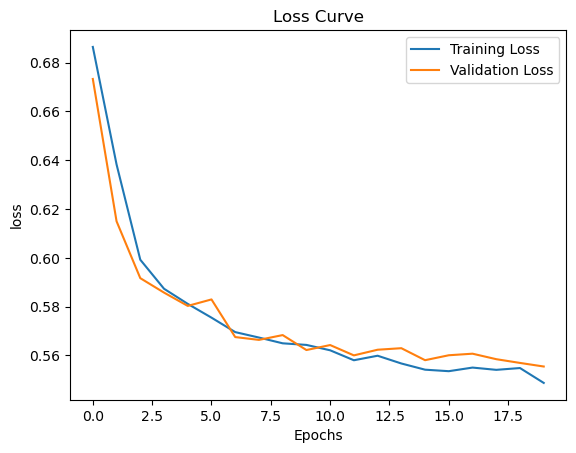

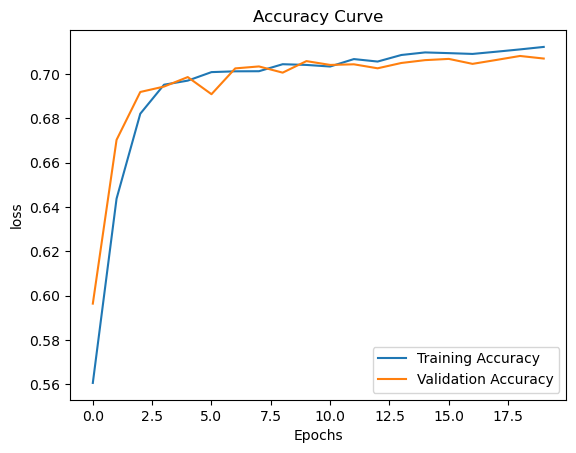

In [84]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']

plt.plot(train_loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

plt.plot(train_accuracy, label = 'Training Accuracy')
plt.plot(val_accuracy, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

In [85]:
demo_review = 'The movie was crass and tasteless'

In [87]:
demo_review.lower().split() # Word embeddings and token indices are case-sensitive, so "Great" and "great" 
                            #would be treated as different words. # Converting to lowercase avoids mismatches 
                            # and reduces vocabulary size, improving model performance and generalization.

['the', 'movie', 'was', 'crass', 'and', 'tasteless']

In [88]:
final_map = []
for word in demo_review.lower().split():
    final_map.append(word_index[word]) # For each word, it looks up the corresponding index from the word_index 
                                       # dictionary and adds it to final_map.

In [89]:
final_map                       # returns a list of word indices, ready for model input

[1, 17, 13, 9254, 2, 5454]

In [90]:
new_input = pad_sequences([final_map], maxlen = 100, padding = 'post')

In [91]:
new_input

array([[   1,   17,   13, 9254,    2, 5454,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0]])

In [96]:
prediction = model.predict(new_input) # feeds new input data (e.g., a sentence or a feature vector) 
                                      # into your trained model to get a prediction.

1/1 [==============================] - 0s 40ms/step


In [101]:
prediction # It returns a 2D array, even if you're predicting on just one sample

array([[0.44098896]], dtype=float32)

In [103]:
prediction[0] # Still a 1D array

array([0.44098896], dtype=float32)

In [104]:
prediction[0][0]

0.44098896

In [105]:
# Getting the actual float value from the nested array
predicted_value = prediction[0][0]

# Applying threshold
if predicted_value >= 0.5:
    print("Positive")
else:
    print("Negative")

Negative
